In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("../data/UpToDate_Results Sewage PCR_TABLE 27.03.23.xlsx")

In [23]:
df['Date'] = df['Date'].ffill()
df['Date'] = pd.to_datetime(df['Date'])


# select relevant rows / columns
df = df.loc[df["Unnamed: 2"]=="Copies/liter",:]
df_cleaned = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df_cleaned = df_cleaned.loc[:, ['Date', 'Comment', 'Langrieder \nBach',
       'Gräfelfinger Str. \n/Waldwiesenstr.', 'Schenkendorfstr.',
       'Schmidbartlanger ', 'Savitsstr.', 'Gyßling Becken']]

# select relevant dates
df_cleaned = df_cleaned.loc[df_cleaned.Date <= "2020-06-01",:]

In [29]:
df_cleaned = pd.melt(df_cleaned, id_vars=['Date', 'Comment'], var_name='Location', value_name='Value')

In [30]:
df_cleaned.head()

,Date,Comment,Location,Value
0,2020-04-16,NaN,Langrieder \nBach,<75
1,2020-04-28,NaN,Langrieder \nBach,788.836775
2,2020-05-05,NaN,Langrieder \nBach,<75
3,2020-05-19,NaN,Langrieder \nBach,<75
4,2020-05-26,NaN,Langrieder \nBach,<75


In [37]:
df_cleaned.to_csv("preprocessed_data/concentration_measurements.csv", index=False)

<Axes: xlabel='Date', ylabel='Value'>

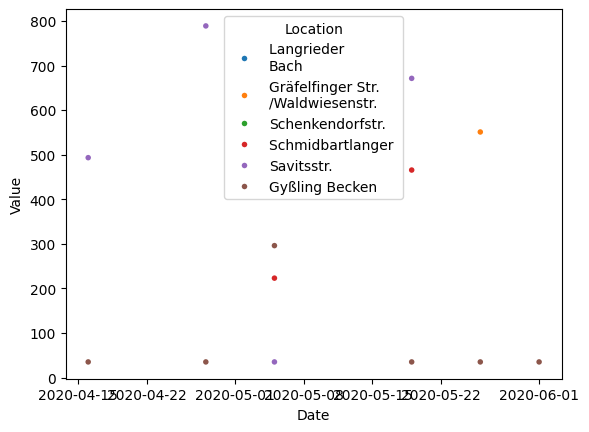

In [35]:
df_plot = df_cleaned.copy()
df_plot.Value = df_plot.Value.apply(lambda x: 35.0 if x=="<75" else float(x))
sns.scatterplot(data=df_plot, x='Date', y='Value', hue='Location', palette="tab10", lw=2)